
 <h1 style="font-family: 'Arial', sans-serif; font-size: 32px; font-weight: bold; color: #333; text-align: center; text-transform: uppercase; letter-spacing: 2px;"> Water Quality Anlaysis in Baltimore City</h1>
 
<i><h3 style="text-align: center;">Jashwanth Kadem (JT23739)</h3></i>




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Assumptions:</h3>

1. The provided dataset accurately represents the surface water quality monitoring data for the City of Baltimore.<br>
2. The recorded measurements are reliable and consistent over time.<br>
3. The parameters and units in the dataset are standardized and properly labeled.<br>
4. There are no significant data quality issues, such as missing values or data entry errors.<br>


<h3> Reading Data </h3>

In [2]:
data=pd.read_csv("Surface_Water_Quality_Data_1995_through_December_2022.csv",encoding='latin')


/var/folders/w7/pxbp84ms275ddj56skkwpyn80000gn/T/ipykernel_21013/3997389895.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Surface_Water_Quality_Data_1995_through_December_2022.csv",encoding='latin')


In [3]:
data.head()

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Parameter,Lab,Result,Unit,datetime
0,1,HAMILTON AVE.,39.33673,-76.53967,Copper_Total,Martel,10,ug/L,4/3/1995 13:30
1,2,HAMILTON AVE.,39.33673,-76.53967,Fecal Coliform,Martel,2400,MPN/100ml,4/3/1995 13:30
2,3,HAMILTON AVE.,39.33673,-76.53967,Lead_Total,Martel,40,ug/L,4/3/1995 13:30
3,4,HAMILTON AVE.,39.33673,-76.53967,Oil & Grease,Martel,2.8,mg/L,4/3/1995 13:30
4,5,HAMILTON AVE.,39.33673,-76.53967,Zinc_Total,Martel,20,ug/L,4/3/1995 13:30


<h3> Shape of the Dataset </h3>

In [4]:
data.shape

(433370, 9)

This dataset contains 433370 observations with 9 columns.

<h3> Summary of the information of the dataset </h3>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433370 entries, 0 to 433369
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              433370 non-null  int64  
 1   Station               433370 non-null  object 
 2   GPS Coordinate North  433370 non-null  float64
 3   GPS Coordinate West   433370 non-null  object 
 4   Parameter             433370 non-null  object 
 5   Lab                   433370 non-null  object 
 6   Result                433370 non-null  object 
 7   Unit                  433370 non-null  object 
 8   datetime              433370 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.8+ MB


<h3> Null Values </h3>

In [6]:
data.isnull().sum()

OBJECTID                0
Station                 0
GPS Coordinate North    0
GPS Coordinate West     0
Parameter               0
Lab                     0
Result                  0
Unit                    0
datetime                0
dtype: int64

Lets look at the data type of each column

In [7]:
data.dtypes

OBJECTID                  int64
Station                  object
GPS Coordinate North    float64
GPS Coordinate West      object
Parameter                object
Lab                      object
Result                   object
Unit                     object
datetime                 object
dtype: object

<h3> Data Transformation </h3>

In [8]:
data['datetime'] = pd.to_datetime(data['datetime']) #datetime column to datetime type
string_columns = ['Station', 'Parameter', 'Lab', 'Unit'] #Station, Parameter, Lab, and Unit columns to string type (object)
data[string_columns] = data[string_columns].astype(str)
data['Result'] = pd.to_numeric(data['Result'], errors='coerce') #Result column to numeric type (float or int)
data['GPS Coordinate North'] = pd.to_numeric(data['GPS Coordinate North'], errors='coerce') #GPS Coordinate North and GPS Coordinate West columns to numeric type (float or int)
data['GPS Coordinate West'] = pd.to_numeric(data['GPS Coordinate West'], errors='coerce') 

In [9]:
data.dtypes

OBJECTID                         int64
Station                         object
GPS Coordinate North           float64
GPS Coordinate West            float64
Parameter                       object
Lab                             object
Result                         float64
Unit                            object
datetime                datetime64[ns]
dtype: object

<h3> Number of Unique Parameters </h3>

In [10]:
len(data['Parameter'].unique())

49

<h3> Number of Unique Stations </h3>

In [11]:
len(data['Station'].unique())

163

<h3> Maximum Observations recored by a station </h3>

In [12]:
data.groupby("Station").size().max()

11264

<h3>List of Labs</h3>

In [13]:
data['Lab'].unique()

array(['Martel', 'WQM Lab', 'WQM Field', 'CTE', 'BRWWTP Lab', 'PWWTP Lab',
       'Ashburton Lab', 'Microbac', 'ALS-MDT'], dtype=object)

<h3> Observations recorded by each lab </h3>

In [14]:
data.groupby('Lab').size()

Lab
ALS-MDT           20037
Ashburton Lab        35
BRWWTP Lab        57504
CTE                2984
Martel            31175
Microbac            543
PWWTP Lab          9244
WQM Field        287513
WQM Lab           24335
dtype: int64

<h3> Cleaning the `Result` Column using Regular Expressions </h3>

In [15]:
import re

# Clean 'Result' column
data['Result'] = data['Result'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# Convert 'Result' column to numeric
data['Result'] = pd.to_numeric(data['Result'], errors='coerce')


<h3> Average Values Recorded by Each Parameter </h3>

In [16]:
avg_by_parameter = data.groupby('Parameter')['Result'].mean()
print(avg_by_parameter)


Parameter
Ammonia-Nitrogen                    0.295134
Antimony_Dissolved                  2.957000
Antimony_Total                      3.206453
Arsenic_Dissolved                   1.356930
Arsenic_Total                       2.465877
BOD5                                5.731194
COD                                48.480121
Cadmium_Dissolved                   0.292500
Cadmium_Total                       1.007674
Chloride                          569.527153
Chlorine                            0.203883
Chlorine_Spec                       0.033428
Chromium_Dissolved                 51.141687
Chromium_Total                     39.114134
Conductivity                     1556.815651
Copper, Total                       5.600000
Copper_Dissolved                    5.230875
Copper_Total                        9.306457
Dissolved Oxygen                   10.209372
E. Coli                          3482.481708
Enterococcus                     3403.289101
Fecal Coliform                  22990.363157


<h3> Average Result Per Year <h3>

In [17]:
data['Year'] = data['datetime'].dt.year
avg_by_year = data.groupby('Year')['Result'].mean()
print(avg_by_year)


Year
1995    2420.132495
1996    1149.905134
1997    1139.564265
1998    2679.993032
1999    4040.332126
2000    3358.433613
2001    3104.536849
2002    3577.828711
2003    3295.458507
2004    2757.233245
2005    2021.588378
2006    2342.239660
2007    2538.990040
2008     983.796403
2009     597.866030
2010     522.924191
2011     521.270503
2012     377.700891
2013     347.191445
2014     276.841403
2015     332.113746
2016     287.662231
2017     280.276248
2018     207.515068
2019     175.608212
2020     146.023779
2021     183.462902
2022     202.470898
2023     191.534249
Name: Result, dtype: float64


<h3> Visualization of Average Result Per Year</h3>

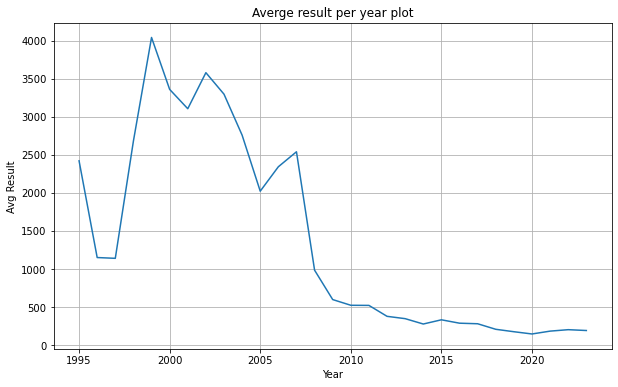

In [18]:
plt.figure(figsize=(10,6))
plt.plot(avg_by_year)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Avg Result")
plt.title("Averge result per year plot")
plt.show()

The average result was high during 1995-2000
<h3> Count of Each Parameter </h3>

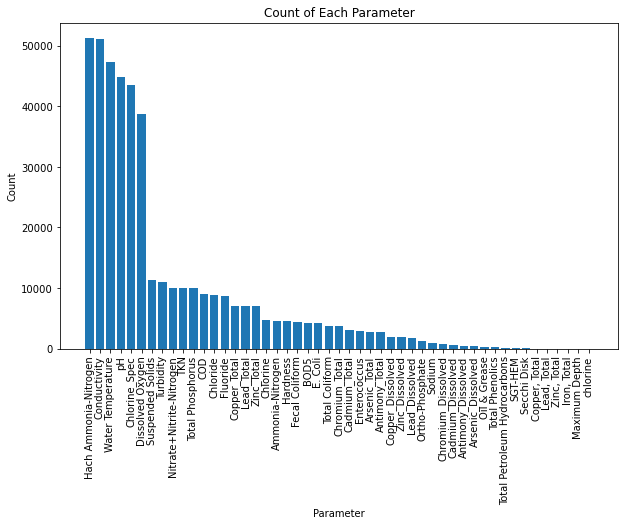

In [19]:
#Bar plot of the count of each unique 'Parameter' in the dataset:
parameter_counts = data['Parameter'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(parameter_counts.index, parameter_counts.values)
plt.xlabel('Parameter')
plt.ylabel('Count')
plt.title('Count of Each Parameter')
plt.xticks(rotation=90)
plt.show()


<h3> Result plot for 'Hamilton Ave' station </h3>

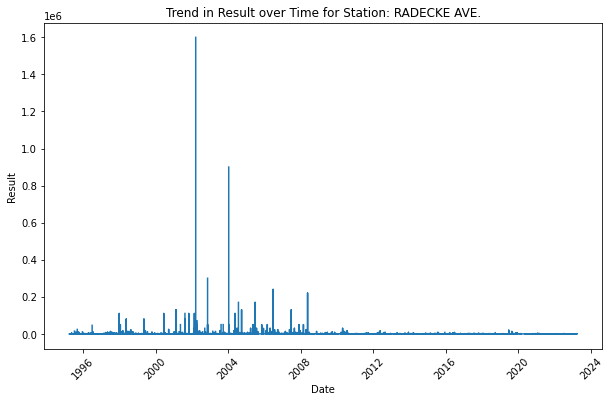

In [20]:
# Choose a specific station
station = 'RADECKE AVE.'

# Filter the dataset for the chosen station
filtered_data = data[data['Station'] == station]

# Plot the trend in 'Result' over time
plt.figure(figsize=(10,6))
plt.plot(filtered_data['datetime'], filtered_data['Result'])
plt.xlabel('Date')
plt.ylabel('Result')
plt.title('Trend in Result over Time for Station: {}'.format(station))
plt.xticks(rotation=45)
plt.show()


<h3> Pie Chart for Distribution of Parameters </h3>

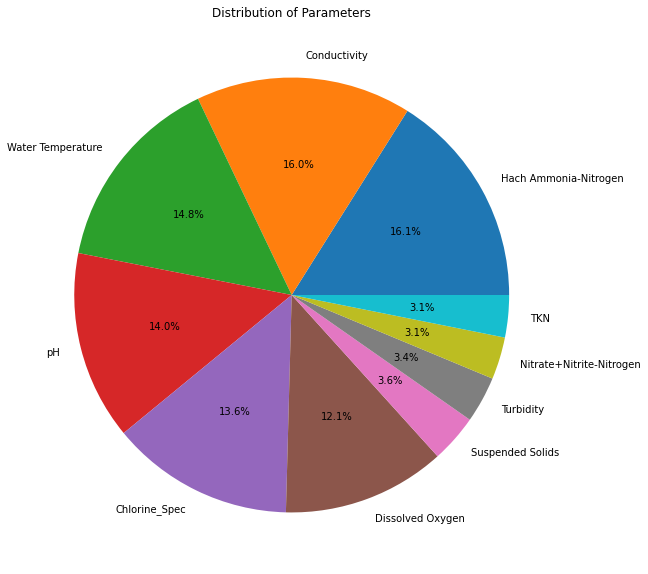

In [21]:
parameter_counts = data['Parameter'].value_counts().nlargest(10)

plt.figure(figsize=(10, 10))
plt.pie(parameter_counts.values, labels=parameter_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Parameters')
plt.show()


<h3> Average Result by Day of the Week </h3>

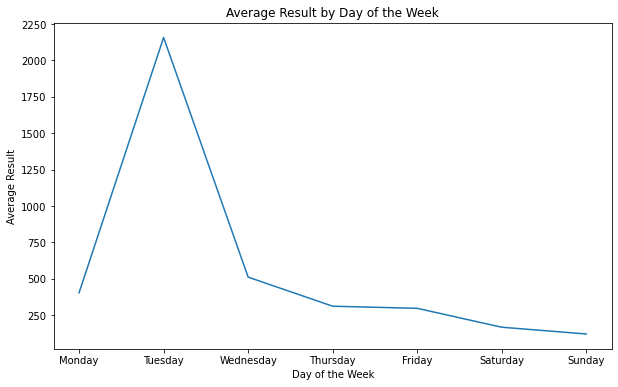

In [22]:
data['DayOfWeek'] = data['datetime'].dt.dayofweek
average_by_dayofweek = data.groupby('DayOfWeek')['Result'].mean()
plt.figure(figsize=(10,6))
plt.plot(average_by_dayofweek.index, average_by_dayofweek.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Result')
plt.title('Average Result by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


<h3> Count of Measurements by each station </h3>

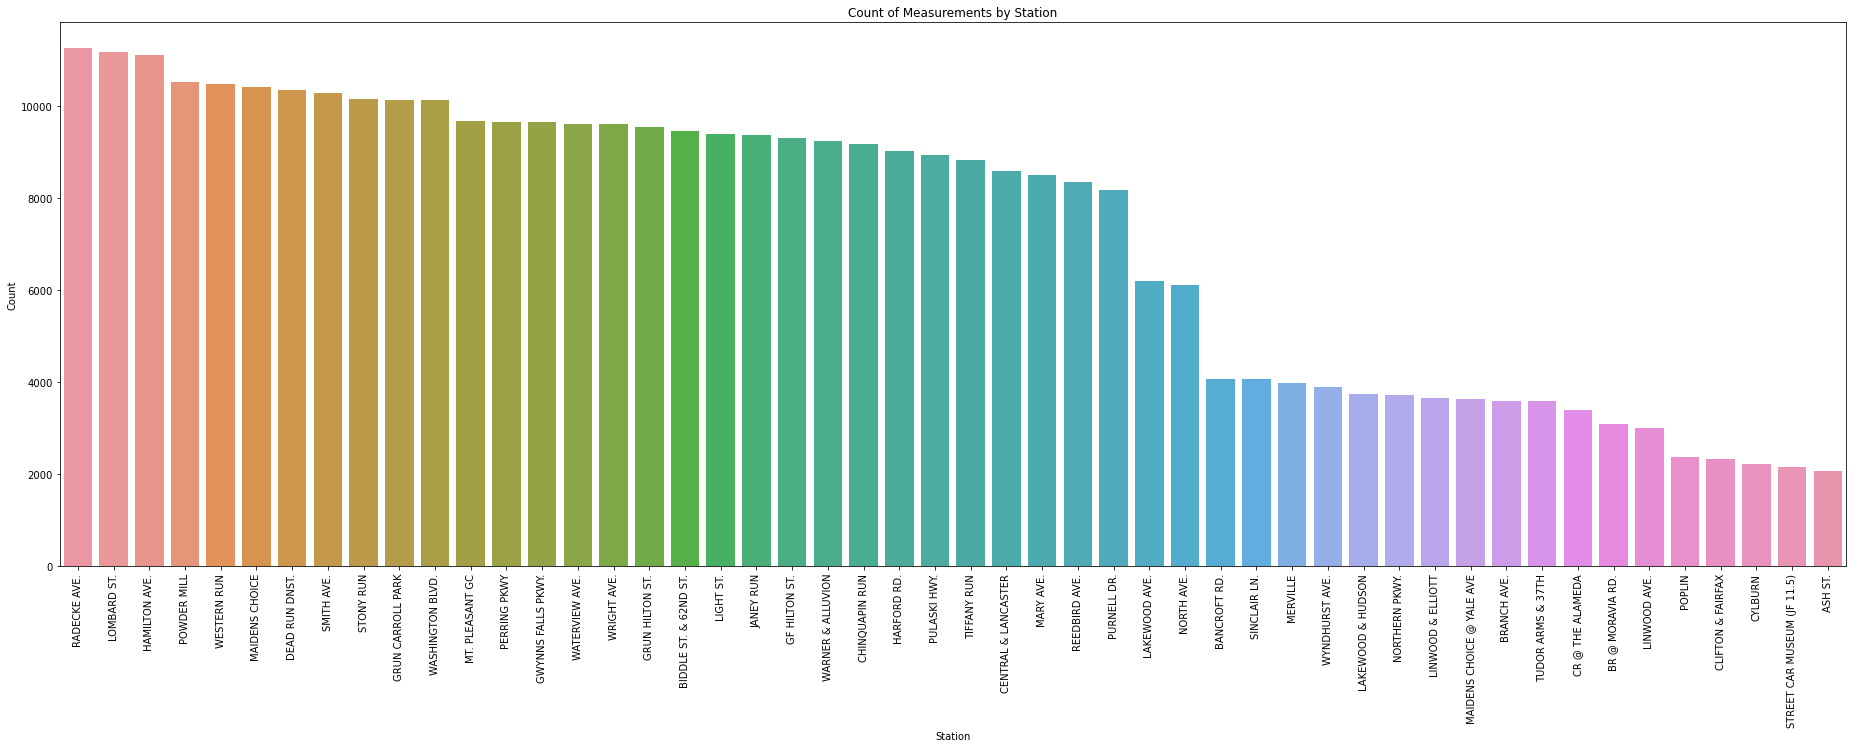

In [28]:
station_counts = data['Station'].value_counts().nlargest(50)
plt.figure(figsize=(32, 10))
sns.barplot(x=station_counts.index, y=station_counts.values)
plt.xlabel('Station')
plt.ylabel('Count')
plt.title('Count of Measurements by Station')
plt.xticks(rotation=90)
plt.show()


<h3> Top 10 Most Frequent Parameters </h3>

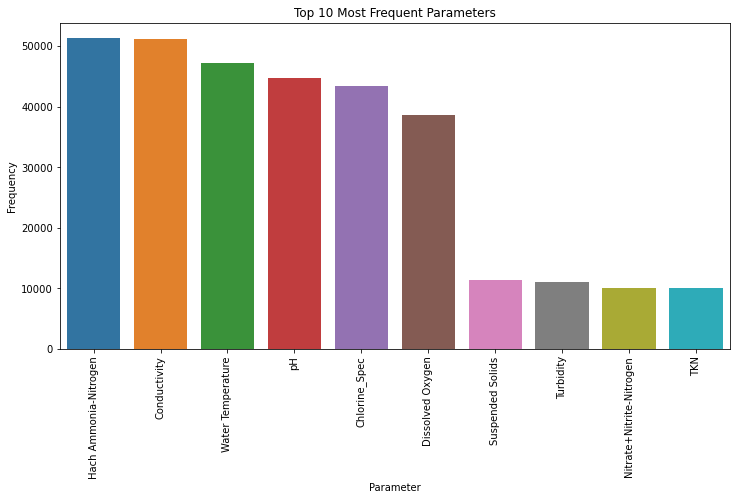

In [46]:
top_parameters = data['Parameter'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_parameters.index, y=top_parameters.values)
plt.xlabel('Parameter')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Parameters')
plt.xticks(rotation=90)
plt.show()


<h3> Maximum water temperature recorded </h3>

In [49]:
max_water_temp=data[data['Parameter']=='Water Temperature']['Result'].max()

The Maximum water temperature recorded was 33.17 degree centigrade

<h3> Maximum values recorded in each parameter </h3>

In [50]:
data.groupby('Parameter').max()

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Lab,Result,Unit,datetime,Year,DayOfWeek
Parameter,,,,,,,,,,
Ammonia-Nitrogen,166316,WRIGHT AVE.,39.367820,-76.530450,WQM Lab,19.000,mg/L,2009-01-12 10:54:00,2009,4
Antimony_Dissolved,104825,WRIGHT AVE.,39.367820,-76.530450,Martel,6.250,ug/L,2004-12-20 12:16:00,2004,2
Antimony_Total,105406,WRIGHT AVE.,39.367820,-76.530450,Martel,15.100,ug/L,2005-01-04 11:00:00,2005,4
Arsenic_Dissolved,104827,WRIGHT AVE.,39.367820,-76.530450,Martel,2.890,ug/L,2004-12-20 12:16:00,2004,2
Arsenic_Total,105407,WRIGHT AVE.,39.367820,-76.530450,Martel,70.000,ug/L,2005-01-04 11:00:00,2005,4
BOD5,406378,WRIGHT AVE.,39.367820,-76.530450,PWWTP Lab,3136.000,mg/L,2022-01-25 12:29:00,2022,4
COD,410150,WRIGHT AVE.,39.367820,-76.530450,WQM Lab,8110.000,mg/L,2022-03-22 11:13:00,2022,4
Cadmium_Dissolved,104830,WRIGHT AVE.,39.367820,-76.530450,Martel,3.500,ug/L,2004-12-20 12:16:00,2004,3
Cadmium_Total,105634,WRIGHT AVE.,39.367820,-76.530450,Martel,423.000,ug/L,2005-01-11 12:38:00,2005,4


In [51]:
data.groupby('Parameter').max()['Station'].value_counts()

WRIGHT AVE.         30
WYNDHURST AVE.       8
RADECKE AVE.         4
WATERVIEW AVE.       2
WASHINGTON BLVD.     2
WESTERN RUN          1
LIGHT ST.            1
MARY AVE.            1
Name: Station, dtype: int64

`Wright AVE` has recorded maximum values for most of the parameters among the rest

<h3> Count of Measurements by Month </h3>
    

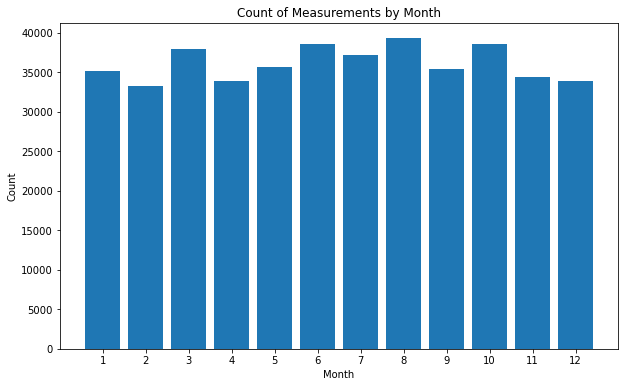

In [52]:
data['Month'] = data['datetime'].dt.month
measurements_by_month = data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(measurements_by_month.index, measurements_by_month.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Measurements by Month')
plt.xticks(range(1, 13))
plt.show()


<h3> Water Quality Result Over Time </h3>

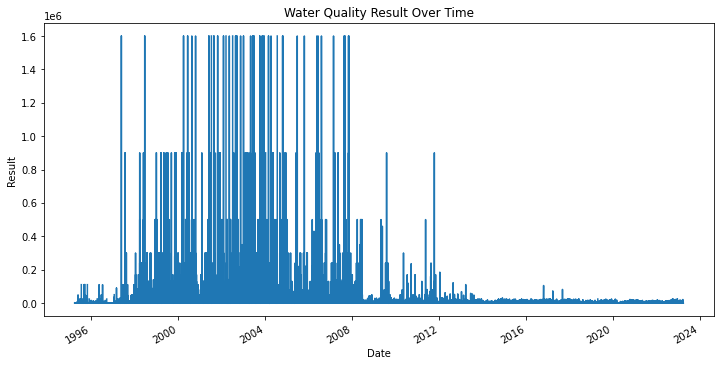

In [53]:
data.set_index('datetime', inplace=True)
plt.figure(figsize=(12, 6))
data['Result'].plot()
plt.xlabel('Date')
plt.ylabel('Result')
plt.title('Water Quality Result Over Time')
plt.show()


<h3> Outliers in 'Result' Column </h3>

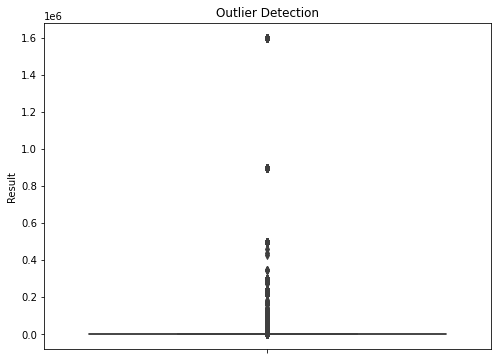

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Result')
plt.ylabel('Result')
plt.title('Outlier Detection')
plt.show()


<h3> Distribution of Parameters </h3>

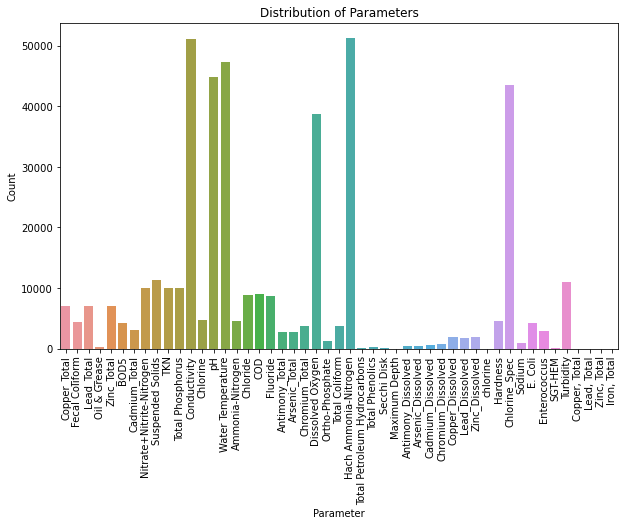

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Parameter')
plt.xlabel('Parameter')
plt.ylabel('Count')
plt.title('Distribution of Parameters')
plt.xticks(rotation=90)
plt.show()


<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      font-family: Arial, sans-serif;
    }

    h1 {
      font-size: 24px;
      font-weight: bold;
      text-align: center;
      margin-bottom: 20px;
    }

    h2 {
      font-size: 18px;
      font-weight: bold;
      margin-top: 20px;
      margin-bottom: 10px;
    }

    p {
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h1>Descriptive Summary of Water Quality Dataset</h1>

  <h2>Dataset Information</h2>
  <p>This dataset contains 433,370 observations with 9 columns. There are no null values in the dataset. The data types of some columns were transformed.</p>

  <h2>Laboratory Observations</h2>
  <p>The 'WQM Field' lab has recorded the maximum number of measurements.</p>

  <h2>Yearly Analysis</h2>
  <p>The highest average result was recorded in the year 1995. The average result was the highest during the period of 1995-2000.</p>

  <h2>Most Recorded Measurements</h2>
  <p>The most frequently recorded measurements are Hach Ammonia-Nitrogen, Conductivity, and Water Temperature.</p>

  <h2>Day of the Week Analysis</h2>
  <p>The average result was the highest on Tuesdays.</p>

  <h2>Station Analysis</h2>
  <p>The Radeck Ave station has recorded the maximum number of measurements among the rest.<br> The Wright Avenue station recorded maximum values for most of the parameters.</p>

  <h2>Top 10 Parameters</h2>
  <p>The top 10 parameters with the highest number of measurements are:<br>
     - Hach Ammonia-Nitrogen<br>
     - Conductivity<br>
     - Water Temperature<br>
     - pH<br>
     - Chlorine_Spec<br>
     - Dissolved Oxygen<br>
     - Suspended Solids<br>
     - Turbidity<br>
     - Nitrate+Nitrite-Nitrogen<br>
     - TKN</p>

  <h2>Monthly Analysis</h2>
  <p>The maximum number of measurements were recorded in the months of March, June, August, and November.<br> The maximum water temperature recorded was 33.17 degrees Celsius.</p>
</body>
</html>
